In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install ppscore

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import ppscore as pps

In [4]:
import warnings
warnings.filterwarnings('ignore')


In [6]:
import os
filelist = os.listdir('./')
# filelist = pd.DataFrame(filelist)

In [7]:
filelist

['unemployed_percent_sex_age_M2005_2020_.xlsx',
 'whole_unemployment_by_sector_total.csv',
 'Italy_Quarterly.xls',
 'Task8_Unemployment.ipynb',
 '.DS_Store',
 'USA_general_unemployment.csv',
 'IHDI_HDI_Gini_country_region.xlsx',
 'Unemployment_Poland.xlsx',
 'indicators_by_country.xlsx',
 'Italy_Regional_and_sector_specific_data.xlsx',
 'Oxford_and_Mobility_Dataset_Cleaned_2020_04_23.csv',
 'USA_general_unemployment.xlsx',
 'Italy_Annually.xls',
 'OECD_mean_disposable_income.xlsx',
 'unemployed_seasonally_adjusted_M2013_2020_.xlsx',
 'Task8_Unemployment.ipynb copy',
 'USA_general_weekly_unemployment_claims.xlsx',
 'india_unemployment.xlsx',
 'USA_state_weekly_unemployment_claims.xlsx',
 'Human_Development_Index_HDI.csv',
 'population_percent_region_labour_status_sex_gender_Q2005_2019_.xlsx',
 'USA_unemployment_by_sector.csv',
 'USA_state_monthly_unemployment_rate.xlsx',
 'df_timeseries.csv',
 'ITALY_Monthly.xls',
 '.ipynb_checkpoints',
 'Policy-Features.pdf',
 'whole_unemployment_by_se

In [8]:
def read_data(link):
  data1 = pd.read_csv(link, encoding = 'latin_1', delimiter = ',')
  return data1

def read_data2(link):
  data2 = pd.read_excel(link, encoding = 'latin_1', delimiter = ',')
  return data2

In [10]:
my_var = {}
for count,f in enumerate(filelist):
  if str(filelist[count])[-3:] == 'csv':
    var = f
    my_var[var] = read_data('./'+str(filelist[count]))
  
  elif str(filelist[count])[-3:] == 'xls':
    var = f
    my_var[var] = read_data2('./'+str(filelist[count]))
  
  elif str(filelist[count])[-3:] == 'lsx':
    var = f
    my_var[var] = read_data2('./'+str(filelist[count]))

In [11]:
filelist[0].split('.',1)[0]

'unemployed_percent_sex_age_M2005_2020_'

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
def snspps(data, size):
  df_matrix = pps.matrix(data)
  plt.figure(figsize=(size,size))
  return sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [13]:
HDI_HDI = my_var['Human_Development_Index_HDI.csv']
HDI_HDI.drop(HDI_HDI.columns[2:25], axis=1, inplace = True)
HDI_HDI.head(5)

,HDI_Rank_(2018),Country,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,0.485,0.488,0.490,0.491,0.493,0.496
1,69,Albania,0.781,0.787,0.788,0.788,0.789,0.791
2,82,Algeria,0.746,0.749,0.751,0.755,0.758,0.759
3,36,Andorra,0.846,0.853,0.850,0.854,0.852,0.857
4,149,Angola,0.547,0.557,0.565,0.570,0.576,0.574


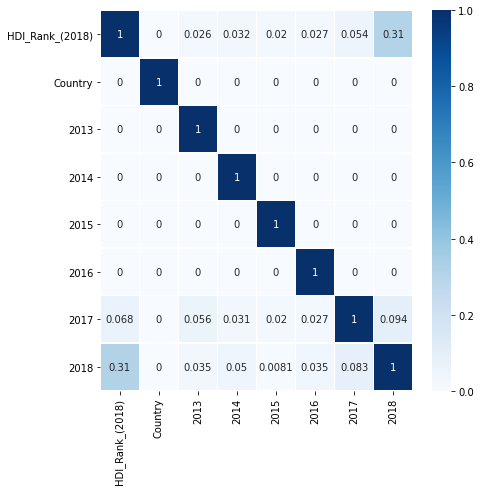

In [12]:
pps(HDI_HDI, 7)

In [ ]:
HDI_HDI_countries = HDI_HDI.groupby(['Country']).describe().index.to_list()

In [14]:
IHDI_HDI = my_var['IHDI_HDI_Gini_country_region.xlsx']
IHDI_HDI.dropna(inplace = True)
IHDI_HDI.reset_index(drop = True, inplace = True)
IHDI_HDI.head(5)

,Country,Category,HDI (2018),IHDI (2018),Gini Coefficient(%)
0,Norway,very high human development,0.953688,0.888768,27.5
1,Switzerland,very high human development,0.945936,0.881521,32.3
2,Ireland,very high human development,0.942473,0.865262,31.8
3,Germany,very high human development,0.938785,0.860676,31.7
4,Australia,very high human development,0.938379,0.862000,35.8


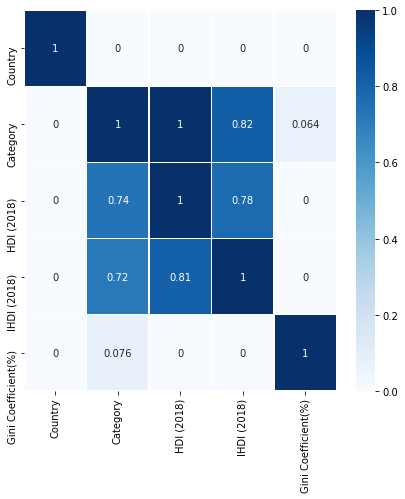

In [15]:
snspps(IHDI_HDI, 7)

In [ ]:
IHDI_HDI_countries = IHDI_HDI.groupby(['Country']).describe().index.to_list()

In [17]:
IHDI_HDI.groupby(['Category', 'Country']).describe()

HDI (2018)  ... Gini Coefficient(%)
                                                                  count  ...                 max
Category                    Country                                      ...                    
high human development      Albania                                 1.0  ...                29.0
                            Algeria                                 1.0  ...                27.6
                            Armenia                                 1.0  ...                33.6
                            Bolivia (Plurinational State of)        1.0  ...                44.0
                            Bosnia and Herzegovina                  1.0  ...                33.0
...                                                                 ...  ...                 ...
very high human development Switzerland                             1.0  ...                32.3
                            Turkey                                  1.0  ...                41.9
                            United Kingdom                          1.0  ...                33.2
                            United States                           1.0  ...                41.5
                            Uruguay                                 1.0  ...                39.5

[137 rows x 24 columns]

In [18]:
ITALY_M = my_var['ITALY_Monthly.xls']
ITALY_M.dropna(inplace = True)
ITALY_M.reset_index(drop = True, inplace = True)
ITALY_M.columns = ITALY_M.iloc[0]
ITALY_M = ITALY_M.iloc[1:]
ITALY_M.head(5)

,observation_date,unemployed male%,unemployed female%,total unemployed %,aged 15-24(%),aged 25+(%)
1,1983-01-01 00:00:00,11.2,4.8,6.9,23.8,3.4
2,1983-02-01 00:00:00,11.4,4.9,7.1,24.4,3.4
3,1983-03-01 00:00:00,11.7,5,7.2,25.1,3.4
4,1983-04-01 00:00:00,11.7,5,7.2,25,3.5
5,1983-05-01 00:00:00,11.7,5,7.3,25.1,3.5


In [19]:
Italy_A = my_var['Italy_Annually.xls']
Italy_A.dropna(inplace = True)
Italy_A.reset_index(drop = True, inplace = True)
Italy_A.columns = Italy_A.iloc[0]
Italy_A = Italy_A.iloc[1:]
Italy_A.head(5)

,observation_date,% of unemployed males,% of unemployed females,% of all persons of italy,aged (15-24)(%),aged (25-54)(%),aged (55-64)(%)
1,1998-01-01 00:00:00,8.65,15.4167,11.3,29.15,9.4,4.65
2,1999-01-01 00:00:00,8.30833,14.7833,10.8667,27.975,9.2,4.825
3,2000-01-01 00:00:00,7.68333,13.5917,10.05,26.1333,8.55,4.475
4,2001-01-01 00:00:00,6.925,12.1083,9.00833,23.1167,7.9,4.35
5,2002-01-01 00:00:00,6.50833,11.35,8.475,22.0417,7.525,4.1


In [20]:
Italy_Q = my_var['Italy_Quarterly.xls']
Italy_Q.dropna(inplace = True)
Italy_Q.reset_index(drop = True, inplace = True)
Italy_Q.columns = Italy_Q.iloc[0]
Italy_Q = Italy_Q.iloc[1:]
Italy_Q.head(5)

,observation_date,unemployed females (%),unemployed males (%),total unemployed (%),aged (15-24) (%),aged (25-54)(%),aged(55-64)(%)
1,1998-01-01 00:00:00,15.5,8.6,11.1,29.7333,9.4,4.44967
2,1998-04-01 00:00:00,15.6667,8.9,11.5,30.0333,9.8,4.59064
3,1998-07-01 00:00:00,14.9,8.76667,11.3,29.1667,9.1,4.72964
4,1998-10-01 00:00:00,15.6,8.9,11.4333,30.4333,9.3,4.8081
5,1999-01-01 00:00:00,15.3,8.6,11.1,29.8667,9.5,4.67692


In [21]:
Italy_Rassd = my_var['Italy_Regional_and_sector_specific_data.xlsx']
Italy_Rassd.fillna(0, inplace = True)
Italy_Rassd.columns = Italy_Rassd.iloc[1]
Italy_Rassd = Italy_Rassd.iloc[2:]
Italy_Rassd.reset_index(drop = True, inplace = True)
Italy_Rassd.head(5)

1,Region,total unemployment rate(%),0.0,% of unemployed women,% of unemployed men
0,Sicily,0,18.9,0.243,0.196
1,Calabria,0,18.8,0.248,0.198
2,Campania,0,18.3,0.234,0.186
3,Apulia,0,14.3,0.188,0.08
4,Molise,0,13.2,0.151,0.116


In [22]:
Italy_Rassd.groupby(['Region']).describe()

1                       0.0                                        
                      count  mean std   min   25%   50%   75%   max
Region                                                             
 Umbria                 1.0   7.0 NaN   7.0   7.0   7.0   7.0   7.0
Abruzzo                 1.0  10.7 NaN  10.7  10.7  10.7  10.7  10.7
Aosta Valley            1.0   5.8 NaN   5.8   5.8   5.8   5.8   5.8
Apulia                  1.0  14.3 NaN  14.3  14.3  14.3  14.3  14.3
Basilicata              1.0   9.5 NaN   9.5   9.5   9.5   9.5   9.5
Calabria                1.0  18.8 NaN  18.8  18.8  18.8  18.8  18.8
Campania                1.0  18.3 NaN  18.3  18.3  18.3  18.3  18.3
Emilia-Romagna          1.0   5.3 NaN   5.3   5.3   5.3   5.3   5.3
Friuli-Venezia Giulia   1.0   5.7 NaN   5.7   5.7   5.7   5.7   5.7
Lazio                   1.0   8.1 NaN   8.1   8.1   8.1   8.1   8.1
Liguria                 1.0   8.4 NaN   8.4   8.4   8.4   8.4   8.4
Lombardy                1.0   5.1 NaN   5.1   5.1   5.1   5.1   5.1
Marche                  1.0   7.5 NaN   7.5   7.5   7.5   7.5   7.5
Molise                  1.0  13.2 NaN  13.2  13.2  13.2  13.2  13.2
Piedmont                1.0   7.8 NaN   7.8   7.8   7.8   7.8   7.8
Sardinia                1.0  12.5 NaN  12.5  12.5  12.5  12.5  12.5
Sicily                  1.0  18.9 NaN  18.9  18.9  18.9  18.9  18.9
Trentino-South Tyrol    1.0   3.6 NaN   3.6   3.6   3.6   3.6   3.6
Tuscany                 1.0   6.0 NaN   6.0   6.0   6.0   6.0   6.0
Veneto                  1.0   5.1 NaN   5.1   5.1   5.1   5.1   5.1

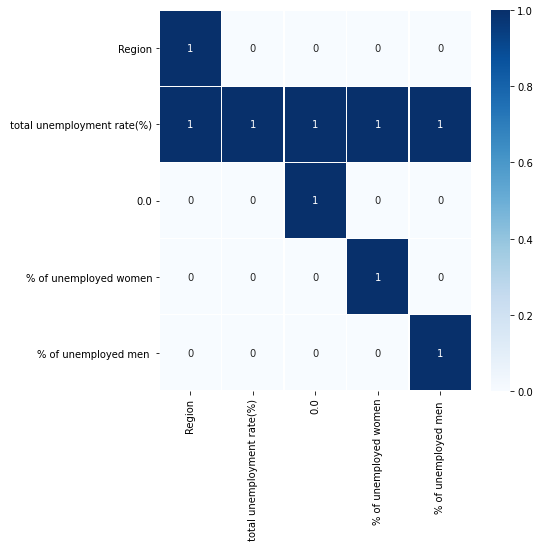

In [23]:
snspps(Italy_Rassd, 7)

In [24]:
OECD_mdi = my_var['OECD_mean_disposable_income.xlsx']
OECD_mdi.head(5)

,Country Code,Country,Year,Unit,Value,Normalized_Value_USD_PPP
0,AUS,Australia,2018,Australian Dollar,55881,38515.883037
1,AUT,Austria,2017,Euro,26872,34881.939847
2,BEL,Belgium,2017,Euro,27253,35261.664504
3,CAN,Canada,2017,Canadian Dollar,47030,39037.598279
4,CZE,Czech Republic,2017,Czech Koruna,290220,23447.211982


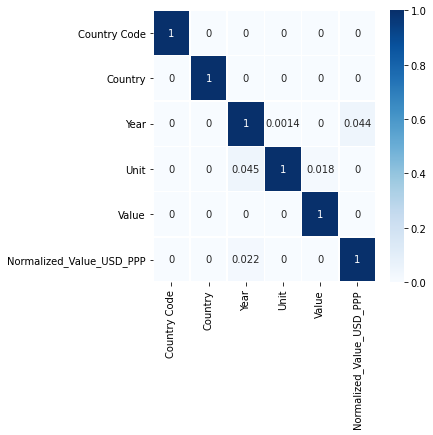

In [25]:
snspps(OECD_mdi, 5)

In [ ]:
OECD_mdi_countries = OECD_mdi.groupby(['Country']).describe().index.to_list()

In [27]:
Oxfor_mdc_2020_04_23 = my_var['Oxford_and_Mobility_Dataset_Cleaned_2020_04_23.csv']
Oxfor_mdc_2020_04_23.head(5)

,Country,Date,Confirmed,Daily_Ccases,Death,Daily_Dcases,MIR%,Days_sinceC,StringencyIx,S_1,S1_SIX,S_2,S2_SIX,S_3,S3_SIX,S_4,S4_SIX,S_5,S5_SIX,S_6,S6_SIX,S_7,S7_SIX,S_8,S_9,S_10,S_11,S_12,S_13,Class
0,Aruba,2020-03-13,2.0,2.0,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High_Income
1,Aruba,2020-03-14,2.0,0.0,0.0,0.0,0.0,1,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High_Income
2,Aruba,2020-03-15,2.0,0.0,0.0,0.0,0.0,2,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High_Income
3,Aruba,2020-03-16,2.0,0.0,0.0,0.0,0.0,3,28.57,2.0,100.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High_Income
4,Aruba,2020-03-17,2.0,0.0,0.0,0.0,0.0,4,28.57,2.0,100.0,0.0,0.0,0.0,0.0,0.0,33.33,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,High_Income


In [ ]:
Oxfor_mdc_2020_04_23_countries = Oxfor_mdc_2020_04_23.groupby(['Country']).describe().index.to_list()

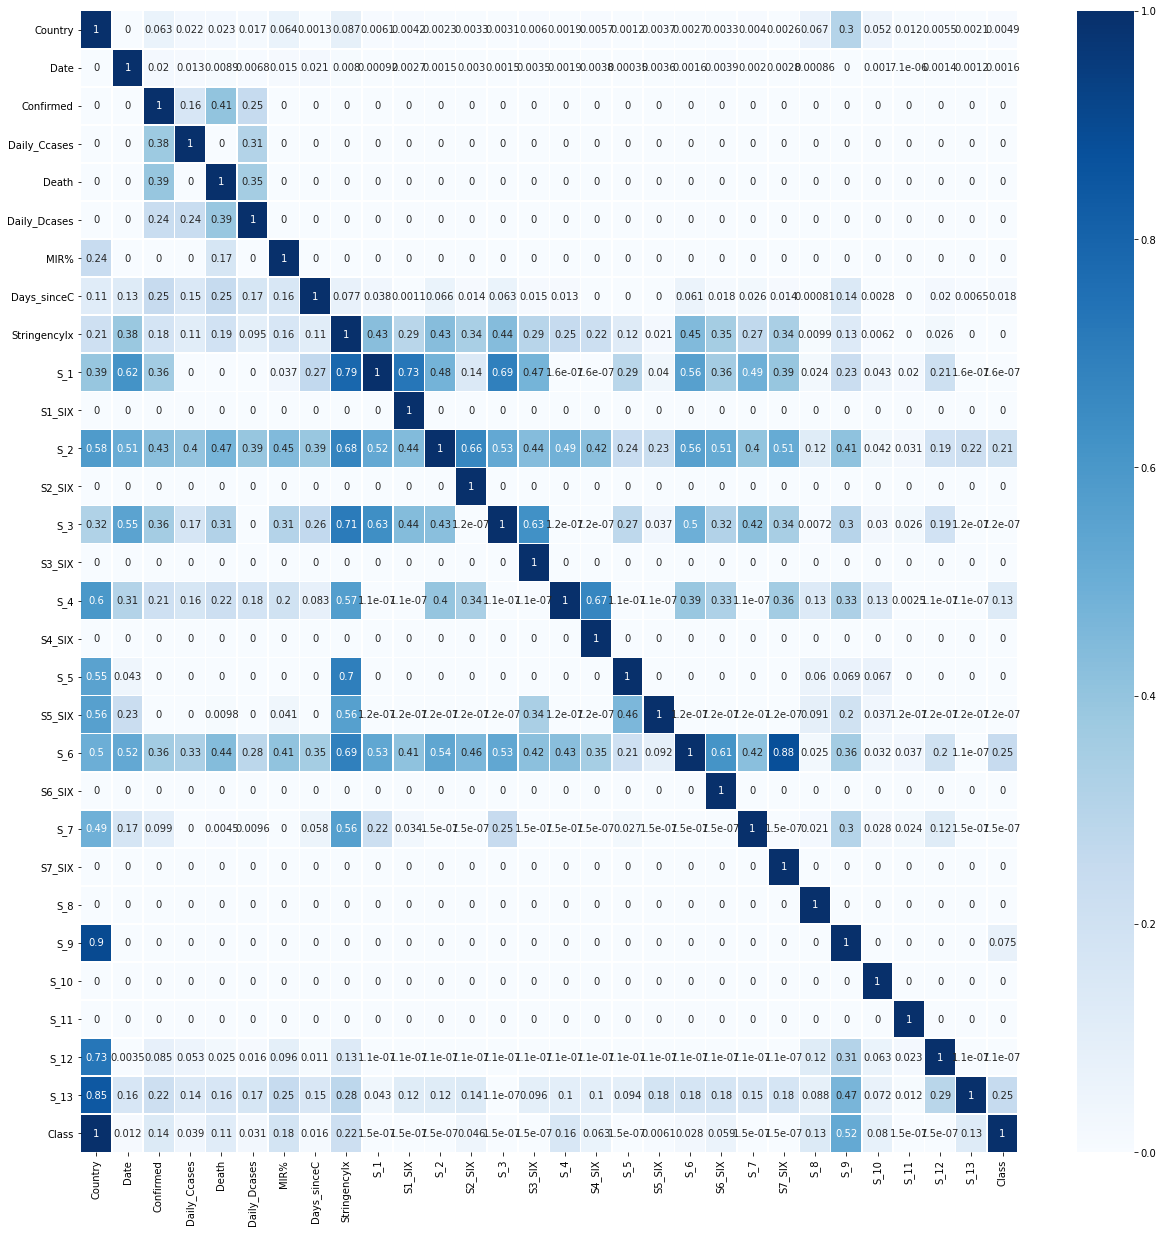

In [29]:
snspps(Oxfor_mdc_2020_04_23, 21)

In [30]:
Oxfor_mdc_2020_04_23.groupby(['Class','Country']).describe()

Confirmed                ... S_13     
                                     count          mean  ...  75%  max
Class               Country                               ...          
High_Income         Andorra           47.0    265.425532  ...  2.0  2.0
                    Aruba             37.0     44.972973  ...  0.0  0.0
                    Australia         85.0   1659.211765  ...  2.0  2.0
                    Austria           53.0   5800.301887  ...  2.0  2.0
                    Bahrain           55.0    464.163636  ...  2.0  2.0
...                                    ...           ...  ...  ...  ...
Upper_Middle_Income South Africa      44.0    994.977273  ...  2.0  2.0
                    Thailand          97.0    576.494845  ...  1.0  2.0
                    Tunisia           47.0    279.361702  ...  1.0  1.0
                    Turkey            38.0  21440.157895  ...  1.0  1.0
                    Venezuela         35.0    120.200000  ...  0.0  0.0

[148 rows x 216 columns]

In [31]:
Oxfor_mdc = my_var['Oxford_and_Mobility_Dataset_complete.csv']
Oxfor_mdc.head(5)

,Unnamed: 0,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S2_Workplace closing,S2_IsGeneral,S3_Cancel public events,S3_IsGeneral,S4_Close public transport,S4_IsGeneral,S5_Public information campaigns,S5_IsGeneral,S6_Restrictions on internal movement,S6_IsGeneral,S7_International travel controls,S8_Fiscal measures,S9_Monetary measures,S10_Emergency investment in health care,S11_Investment in Vaccines,ConfirmedDeaths,StringencyIndex,ConfirmedCases,country_region_code,sub_region_1,sub_region_2,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Qatar,QAT,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Qatar,QAT,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Qatar,QAT,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Qatar,QAT,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Qatar,QAT,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
USA_g_un = my_var['USA_general_unemployment.csv']
USA_g_un.head(5)

,date,labour_force,employment_thousands,unemployment_thousands,unemployment_rate
0,2006-01-31,150214.0,143150.0,7064.0,4.7
1,2006-02-28,150641.0,143457.0,7184.0,4.8
2,2006-03-31,150813.0,143741.0,7072.0,4.7
3,2006-04-30,150881.0,143761.0,7120.0,4.7
4,2006-05-31,151069.0,144089.0,6980.0,4.6


In [ ]:
USA_g_un['date'] = pd.to_datetime(USA_g_un['date'], format = '%Y-%m-%d', utc=None)

In [34]:
USA_g_w_un_c = my_var['USA_general_weekly_unemployment_claims.xlsx']
USA_g_w_un_c.dropna(inplace=True)
USA_g_w_un_c.head(5)

,Date,Initial Claims N.S.A,Initial Claims S.A.,Continued Claims N.S.A,Continued Claims S.A.
0,2019-05-01 00:00:00,350681,220000,2172537.0,1709000.0
1,2019-12-01 00:00:00,343678,216000,2090268.0,1701000.0
2,01/19/2019,269369,209000,2124743.0,1742000.0
3,01/26/2019,250580,236000,2098575.0,1715000.0
4,2019-02-02 00:00:00,254263,230000,2142462.0,1721000.0


In [159]:
USA_s_m_un_r = my_var['USA_state_monthly_unemployment_rate.xlsx']
USA_s_m_un_r.dropna(inplace=True)
USA_s_m_un_r.head(5)

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Conneticut,Delaware,District of Columbia,Florida,Georgia,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebrasaka,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Ohio,Oklahoma,Oregon,Pennsylvania,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Puerto Rico
0,2010-01-01,12.3,8.9,11.1,9.0,12.7,8.9,9.5,9.3,10.2,11.5,10.9,7.2,10.5,12.2,11.8,7.3,7.7,11.5,8.2,9.2,8.1,9.6,14.4,8.5,11.7,10.3,8.4,5.4,13.5,7.0,10.3,8.1,9.6,12.0,4.8,12.0,7.6,11.9,9.5,12.1,12.4,5.9,11.2,8.6,8.4,7.0,7.9,11.3,9.4,10.1,8.1,16
1,2010-02-01,12.1,9.1,10.7,9.0,12.6,8.9,9.5,9.4,9.9,11.2,10.9,6.9,10.4,11.9,11.8,7.1,7.5,11.9,7.2,9.5,8.3,9.2,14.2,8.4,11.3,10.5,8.4,5.3,13.5,6.9,10.3,8.1,9.5,12.0,4.8,11.9,7.6,11.9,9.5,11.9,12.1,5.9,10.8,8.4,8.3,6.9,7.9,11.2,10.0,10.4,7.8,16.1
2,2010-03-01,11.5,8.9,10.4,8.3,12.6,9.1,9.2,9.0,9.5,11.0,10.4,6.9,10.0,11.5,11.6,6.9,7.5,11.0,7.3,9.2,8.1,8.9,14.1,8.6,10.8,10.2,8.4,5.2,13.6,6.7,10.1,8.2,9.1,11.5,4.8,11.4,7.0,11.9,9.2,11.7,11.5,5.9,10.6,8.3,8.4,7.0,7.7,10.9,9.3,10.3,7.6,16.3
3,2010-04-01,10.4,8.3,10.1,7.8,12.0,8.5,8.9,8.5,8.7,10.6,9.9,6.7,9.4,10.5,10.6,5.9,6.9,10.0,7.1,8.5,7.3,8.3,12.9,7.5,9.8,9.3,7.5,4.6,13.4,5.9,9.4,7.9,8.5,10.9,3.8,10.4,6.5,11.0,8.3,11.2,10.9,4.9,9.6,7.9,7.8,6.6,7.0,10.0,8.4,9.0,7.0,17.2
4,2010-05-01,9.9,7.8,10.0,8.0,11.7,8.5,8.9,8.1,8.9,10.5,10.1,6.7,8.3,10.1,10.3,5.6,6.8,10.0,7.6,8.1,7.4,8.2,12.6,7.0,10.4,9.1,6.8,4.5,13.3,5.6,9.2,8.1,8.2,10.9,3.4,9.9,6.8,10.4,8.6,11.2,10.7,4.8,9.3,7.9,7.8,5.9,7.1,9.9,8.3,8.5,6.5,17.1


In [ ]:
USA_s_m_un_r.replace(np.nan, 0, inplace = True)

In [169]:
USA_s_w_un_c = my_var['USA_state_weekly_unemployment_claims.xlsx']
USA_s_w_un_c.head(5)

,State,2/15/2020,2/22/2020,2/29/2020,2020-07-03 00:00:00,03/14/2020,03/21/2020,03/28/2020,2020-04-04 00:00:00
0,Alabama,1981,1735,1575,1663,1819,10892,80984,106739
1,Alaska,915,773,874,815,1120,7847,13774,14590
2,Arizona,3538,3151,3086,3357,3844,29348,88940,132428
3,Arkansas,1602,1055,1418,1843,1382,9275,27756,62086
4,California,43445,34979,41678,43385,57606,186333,1058325,918814


In [37]:
USA_un_by_s = my_var['USA_unemployment_by_sector.csv']
USA_un_by_s.head(5)

,date,"Total, 16 years and over (thousands)","Total, 16 years and over (percentage)",Nonagricultural private wage and salary workers (thousands),Nonagricultural private wage and salary workers (percentage),"Mining, quarrying, and oil and gas extraction (thousands)","Mining, quarrying, and oil and gas extraction (percentage)",Construction (thousands),Construction (percentage),Manufacturing (thousands),Manufacturing (percentage),Durable goods (thousands),Durable goods (percentage),Nondurable goods (thousands),Nondurable goods (percentage),Wholesale and retail trade (thousands),Wholesale and retail trade (percentage),Transportation and utilities (thousands),Transportation and utilities (percentage),Information (thousands),Information (percentage),Financial activities (thousands),Financial activities (percentage),Professional and business services (thousands),Professional and business services (percentage),Education and health services (thousands),Education and health services (percentage),Leisure and hospitality (thousands),Leisure and hospitality (percentage),Other services (thousands),Other services (percentage),Agriculture and related private wage and salary workers (thousands),Agriculture and related private wage and salary workers (percentage),Government workers (thousands),Government workers (percentage),"Self-employed, unincorporated, and unpaid family workers (thousands)","Self-employed, unincorporated, and unpaid family workers (percentage)"
0,2006-01-31,7608.0,5.1,6135.0,5.3,26.0,3.9,868.0,9.0,778.0,4.6,450.0,4.1,328.0,5.4,1203.0,5.7,287.0,5.0,105.0,3.3,233.0,2.4,825.0,6.5,593.0,3.2,910.0,8.1,308.0,4.9,140.0,11.5,457.0,2.2,341.0,3.2
1,2006-02-28,7692.0,5.1,6161.0,5.3,25.0,3.8,836.0,8.6,821.0,4.9,477.0,4.4,344.0,5.7,1141.0,5.4,260.0,4.6,119.0,3.7,268.0,2.8,841.0,6.5,528.0,2.8,1040.0,9.1,281.0,4.4,139.0,11.8,472.0,2.3,332.0,3.1
2,2006-03-31,7255.0,4.8,5830.0,5.0,14.0,2.1,820.0,8.5,701.0,4.1,409.0,3.7,292.0,4.8,1022.0,4.9,263.0,4.7,116.0,3.5,298.0,3.1,824.0,6.3,563.0,3.0,917.0,8.0,292.0,4.6,117.0,9.8,461.0,2.2,300.0,2.8
3,2006-04-30,6804.0,4.5,5454.0,4.7,17.0,2.5,674.0,6.9,745.0,4.5,414.0,3.9,331.0,5.6,972.0,4.6,272.0,4.8,132.0,4.2,293.0,3.1,644.0,4.9,558.0,3.0,882.0,7.6,266.0,4.1,81.0,6.2,414.0,2.0,334.0,3.1
4,2006-05-31,6655.0,4.4,5377.0,4.6,20.0,2.8,647.0,6.6,680.0,4.1,372.0,3.5,308.0,5.2,1025.0,4.8,226.0,4.0,158.0,4.8,289.0,3.0,695.0,5.3,543.0,2.9,830.0,7.0,265.0,4.2,79.0,6.0,429.0,2.1,251.0,2.3


In [38]:
Pol_un = my_var['Unemployment_Poland.xlsx']
Pol_un.head(5)

,date,overall,rate,overall_adjusted,rate_adjusted,overall_harmonized,rate_harmonized,overall_harmonized_adjusted,rate_harmonized_adjusted,overall_women,overall_men,new_registered,new_unregistered,took_a_job,living_in_villages_overall,living_in_villages_women,living_in_villages_men,living_in_villages_new_registered,living_in_villages_new_unregistered,living_in_village_took_a_job,open_positions
0,1990-01-01,55800,0.3,27062.966599,0.185726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-02-01,152200,0.9,135246.436693,0.862505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1990-03-01,266600,1.5,259541.925062,1.562274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1990-04-01,351100,2.0,387056.325892,2.242361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1990-05-01,443200,2.5,508962.339989,2.864125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ind_un = my_var['india_unemployment.xlsx']
ind_un.head(5)

,Region,Date,Frequency,Estimated Unemployment Rate (%): total,Estimated Employed: total,Estimated Labour Participation Rate (%): total,Estimated Unemployment Rate (%): urban,Estimated Employed: urban,Estimated Labour Participation Rate (%): urban,Estimated Unemployment Rate (%): rural,Estimated Employed: rural,Estimated Labour Participation Rate (%): rural
0,Andhra Pradesh,2019-11-30,M,5.14,16066453.0,39.59,7.54,4668772,36.62,4.12,11397681.0,41.00
1,Andhra Pradesh,2019-12-31,M,5.39,17442358.0,43.03,7.88,4913963,38.61,4.38,12528395.0,45.14
2,Andhra Pradesh,2020-01-31,M,5.61,16609148.0,41.01,7.35,4578578,35.69,4.94,12030570.0,43.55
3,Andhra Pradesh,2020-02-29,M,5.83,16569356.0,40.95,5.71,4832863,36.94,5.88,11736493.0,42.87
4,Andhra Pradesh,2020-03-31,M,5.72,15903543.0,39.20,9.88,4521538,36.08,3.96,11382005.0,40.70


<Figure size 1440x1440 with 0 Axes>

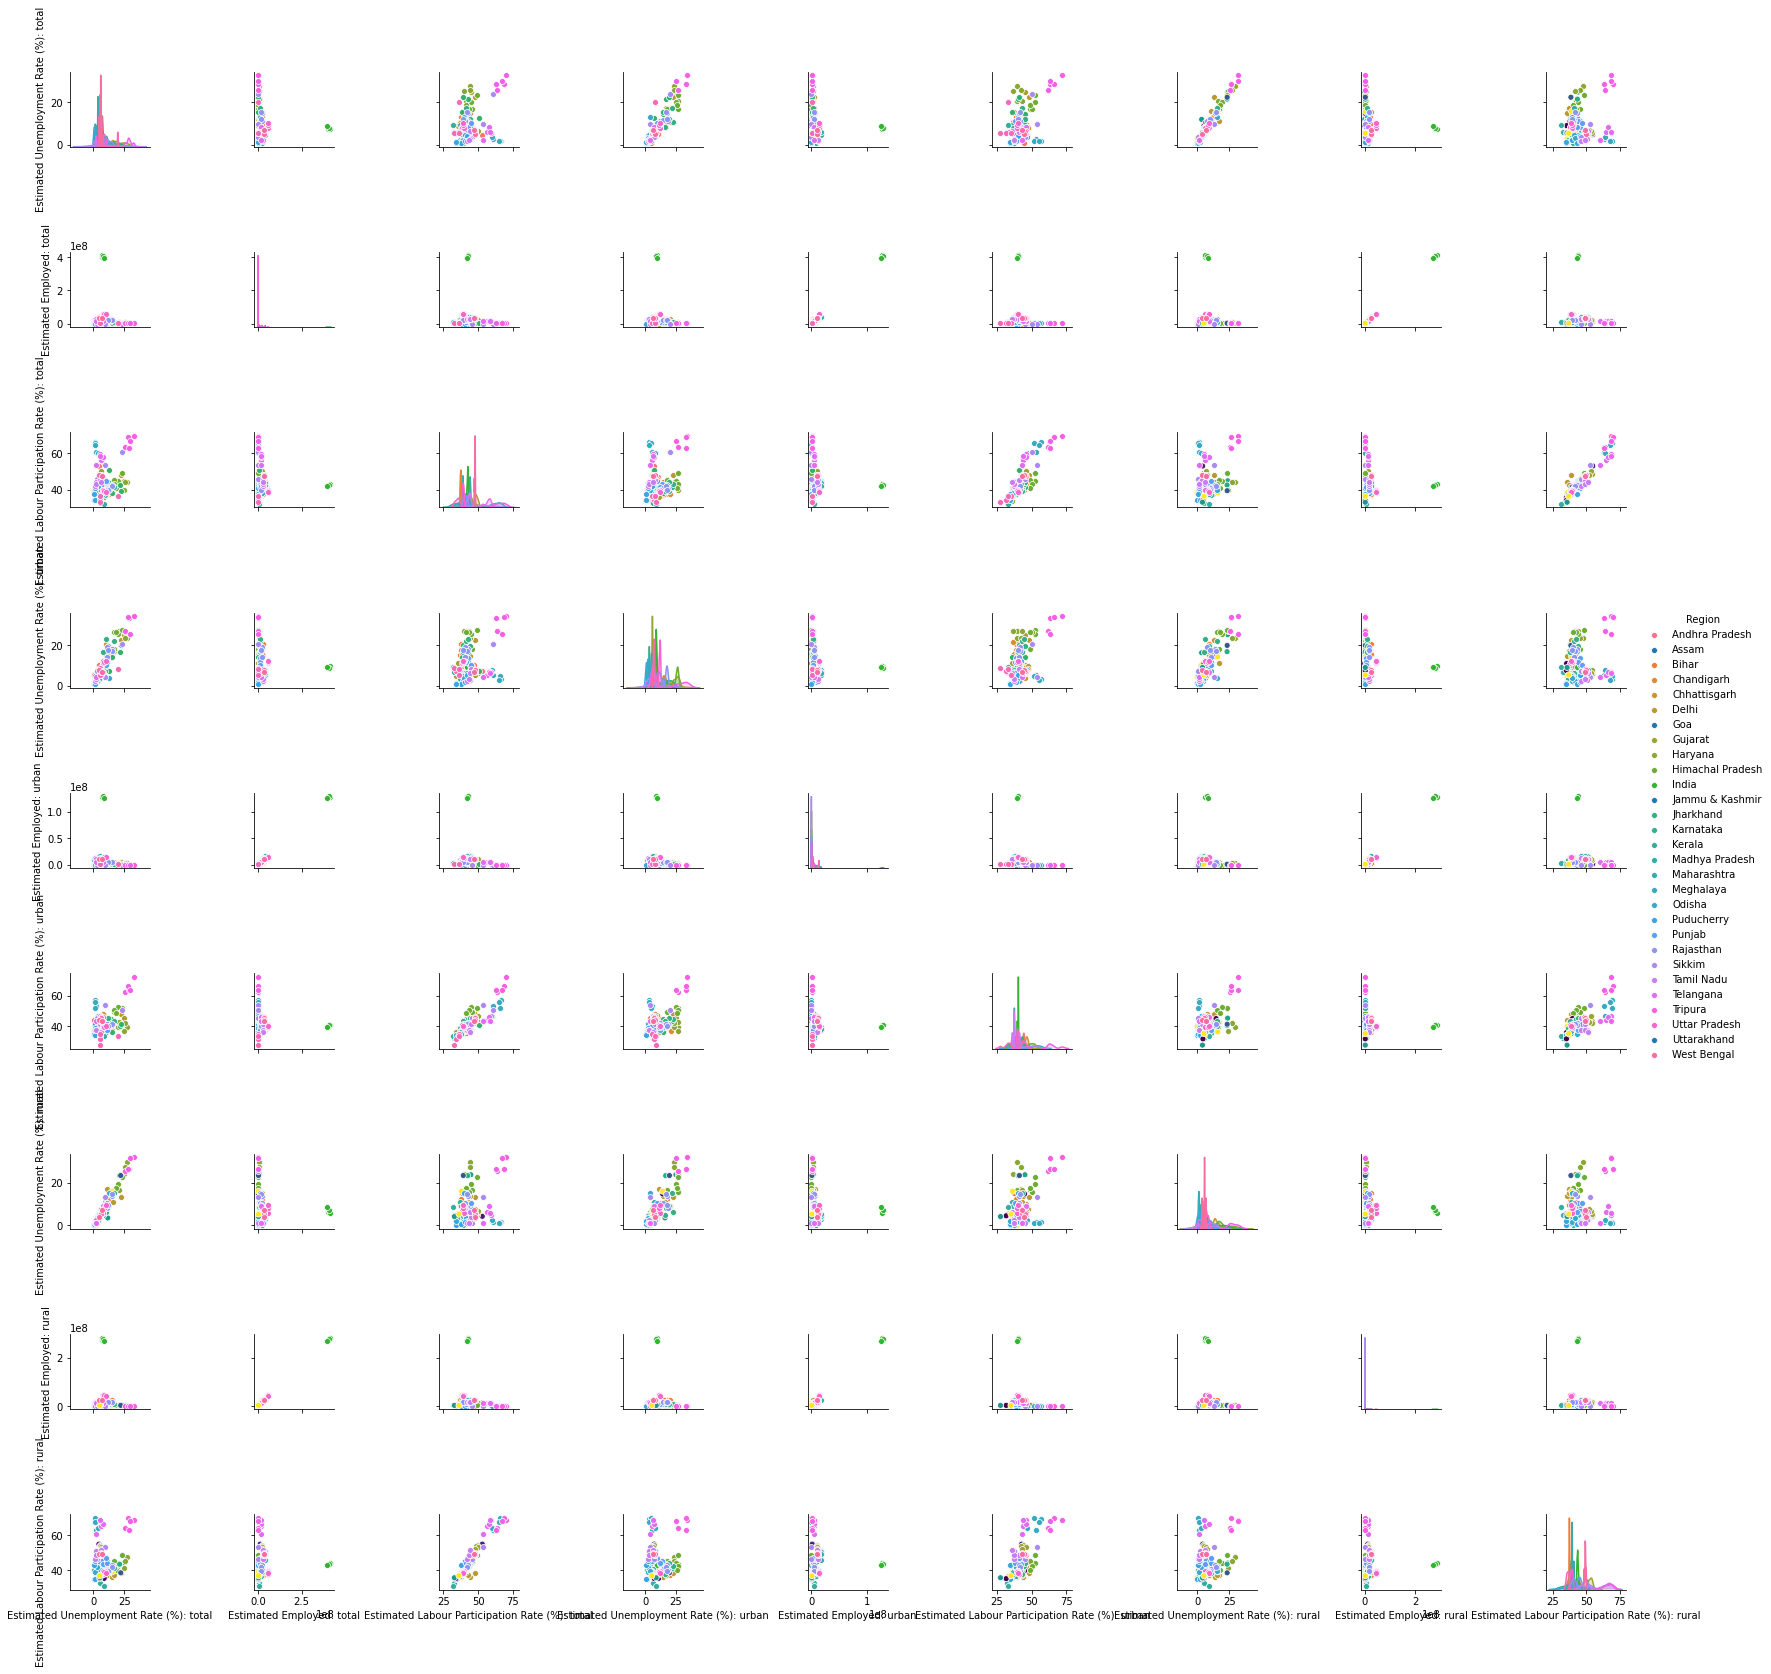

In [70]:
plt.figure(figsize=(20,20))
sns.pairplot(ind_un, hue='Region')
plt.show()

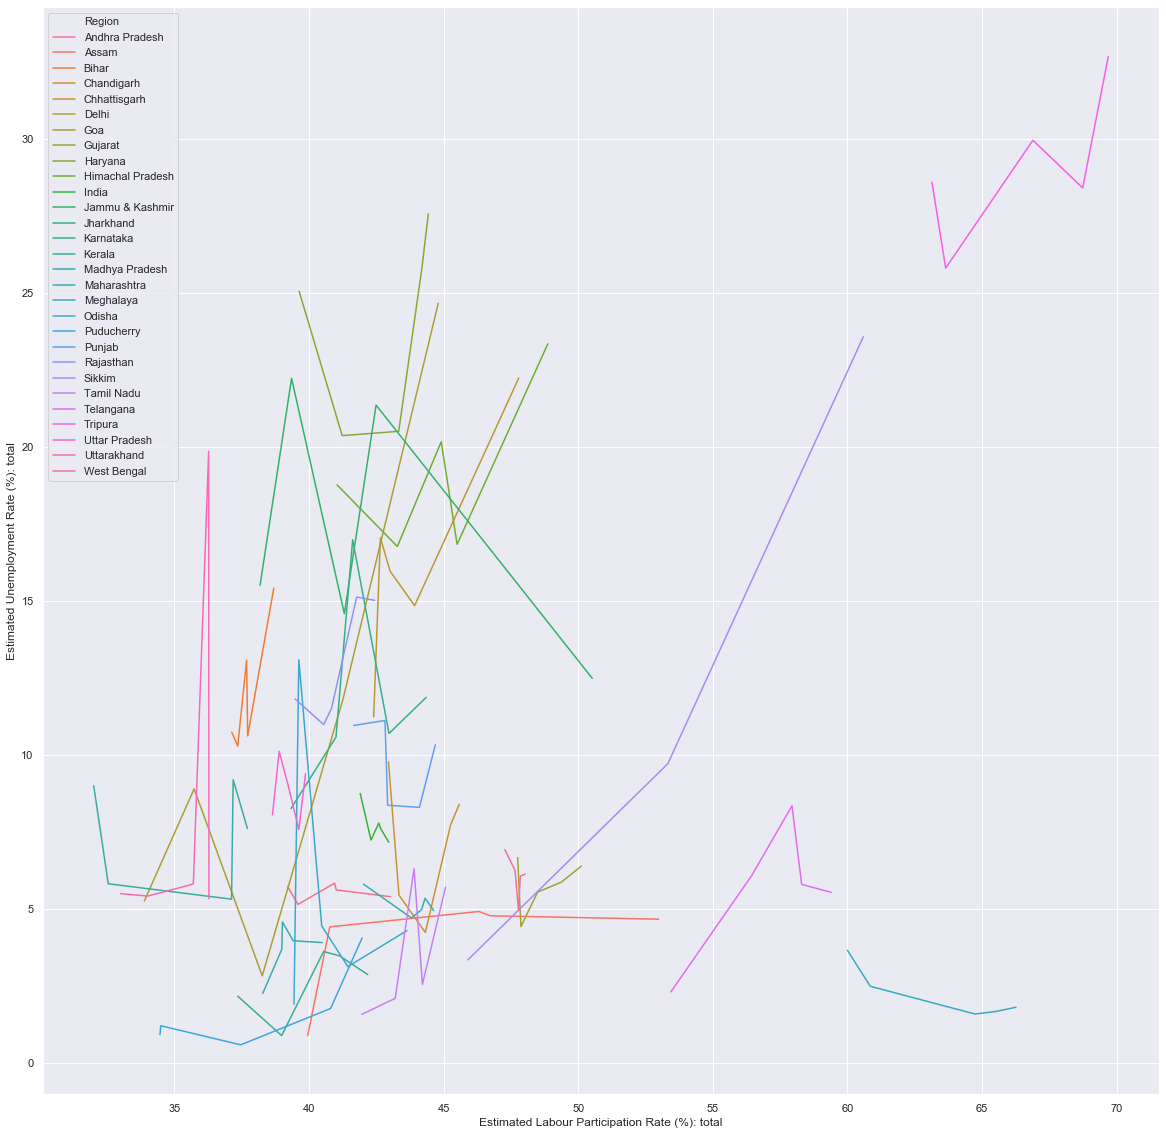

In [24]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Estimated Labour Participation Rate (%): total', y='Estimated Unemployment Rate (%): total',
             hue='Region', markers = True, dashes = False,
             data=ind_un)
plt.show()

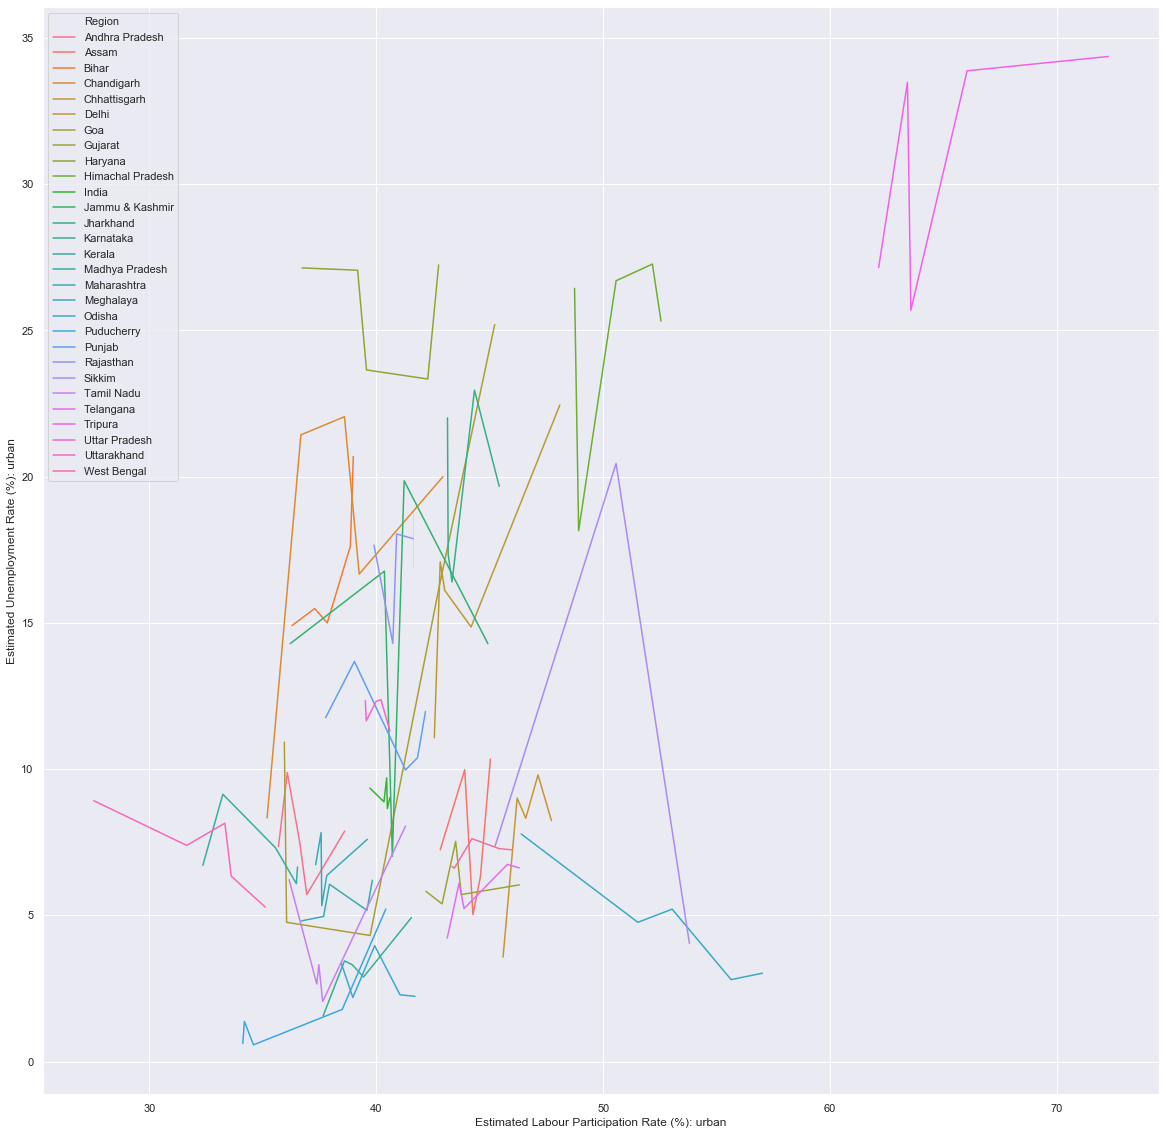

In [27]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Estimated Labour Participation Rate (%): urban', y='Estimated Unemployment Rate (%): urban',
             hue='Region', markers = True, dashes = False,
             data=ind_un)
plt.show()

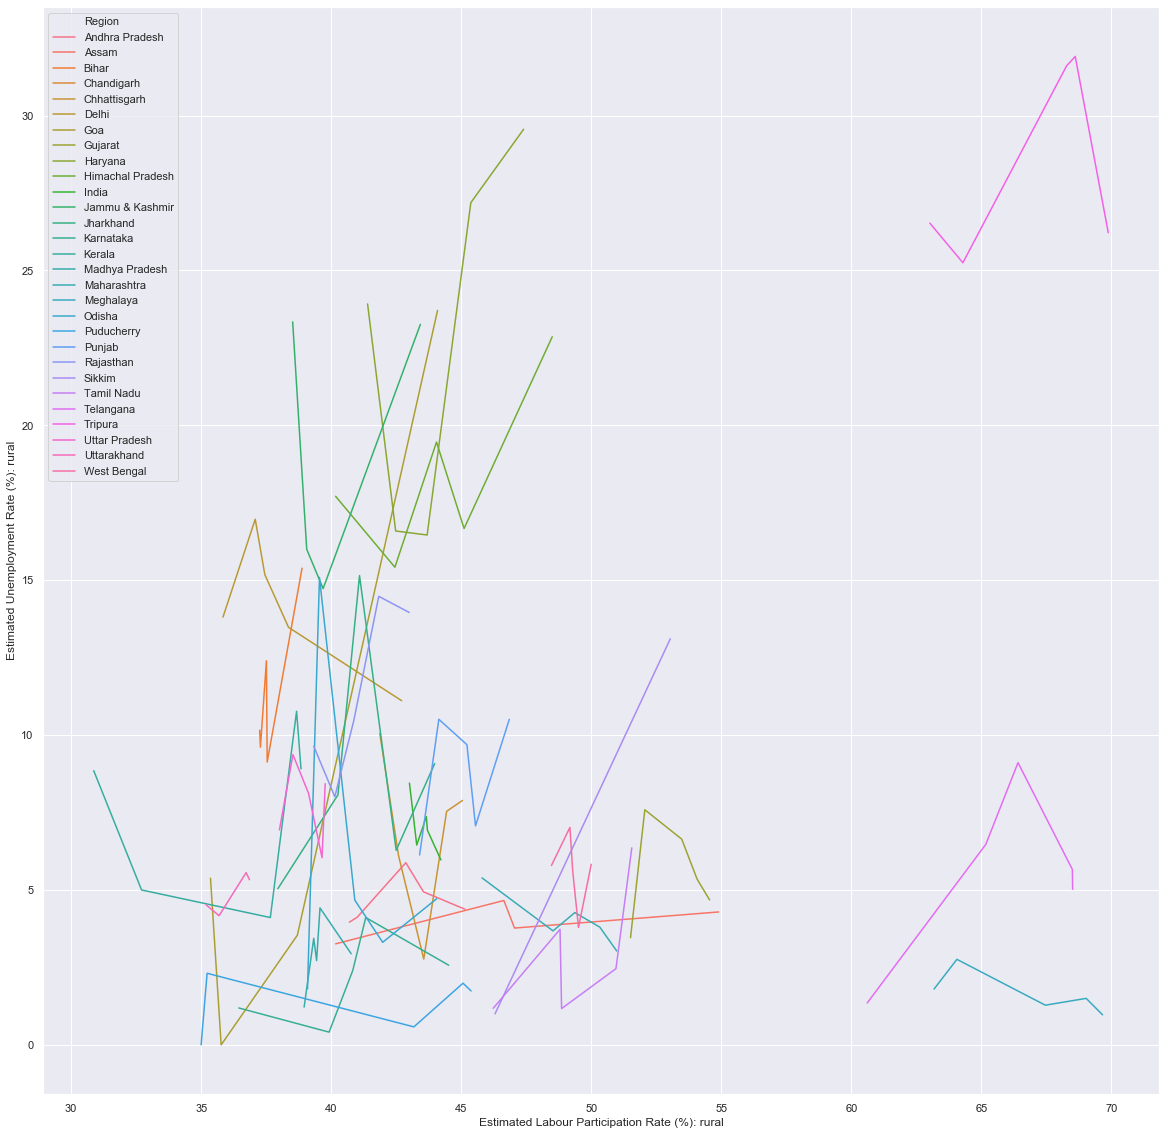

In [28]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Estimated Labour Participation Rate (%): rural', y='Estimated Unemployment Rate (%): rural',
             hue='Region', markers = True, dashes = False,
             data=ind_un)
plt.show()

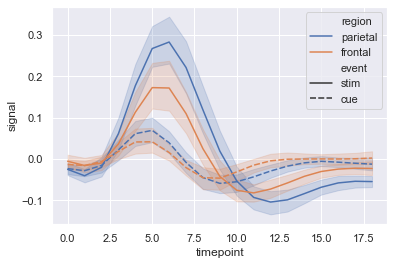

In [15]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)


In [16]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [37]:
indic_by_c = my_var['indicators_by_country.xlsx']
indic_by_c.head(5)

,Country,Category,HDI (2018),IHDI (2018),Gini Coefficient(%),Year and survey,Population in Multidimensional poverty (%),Population Vulnerable to Multidimensional poverty (%),Last CPI,Previous CPI,Reference last CPI,last_percent_change_CPI
0,Afghanistan,low human development,0.495960,NaN,NaN,2015/2016 D,55.910242,18.137625,117.0,118.0,2020-02-01,-0.847458
1,Albania,high human development,0.791406,0.704804,29.0,2017/2018 D,0.703561,5.040320,110.0,110.0,2020-03-01,0.000000
2,Algeria,high human development,0.758978,0.604354,27.6,2012/2013 M,2.100729,5.836775,220.0,220.0,2020-02-01,0.000000
3,Andorra,very high human development,0.856781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4,Angola,medium human development,0.574488,0.392022,42.7,2015/2016 D,51.104110,15.542856,287.0,282.0,2020-03-01,1.773050


<Figure size 2160x2160 with 0 Axes>

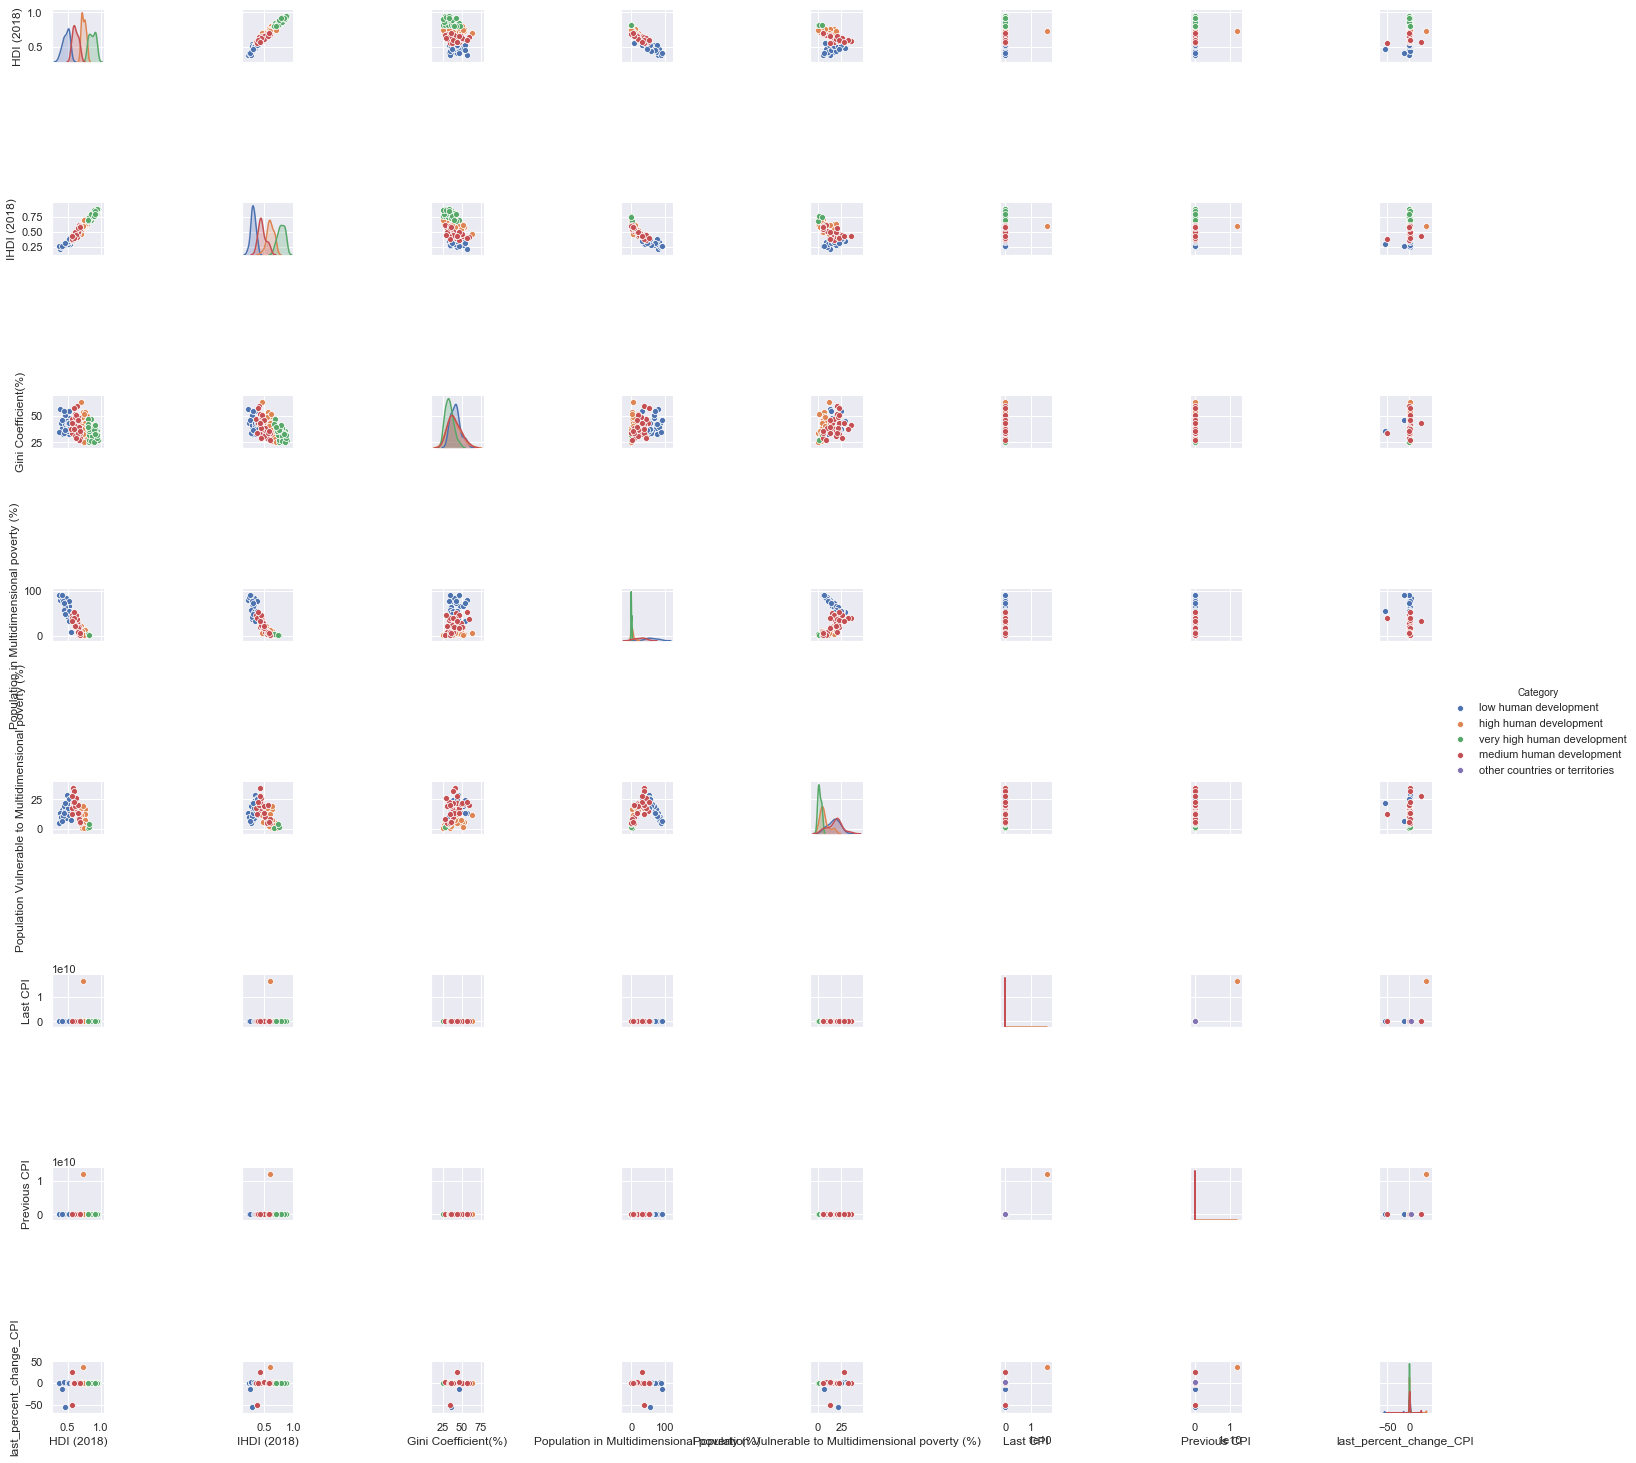

In [38]:
plt.figure(figsize=(30,30))
sns.pairplot(indic_by_c, hue='Category')
plt.show()

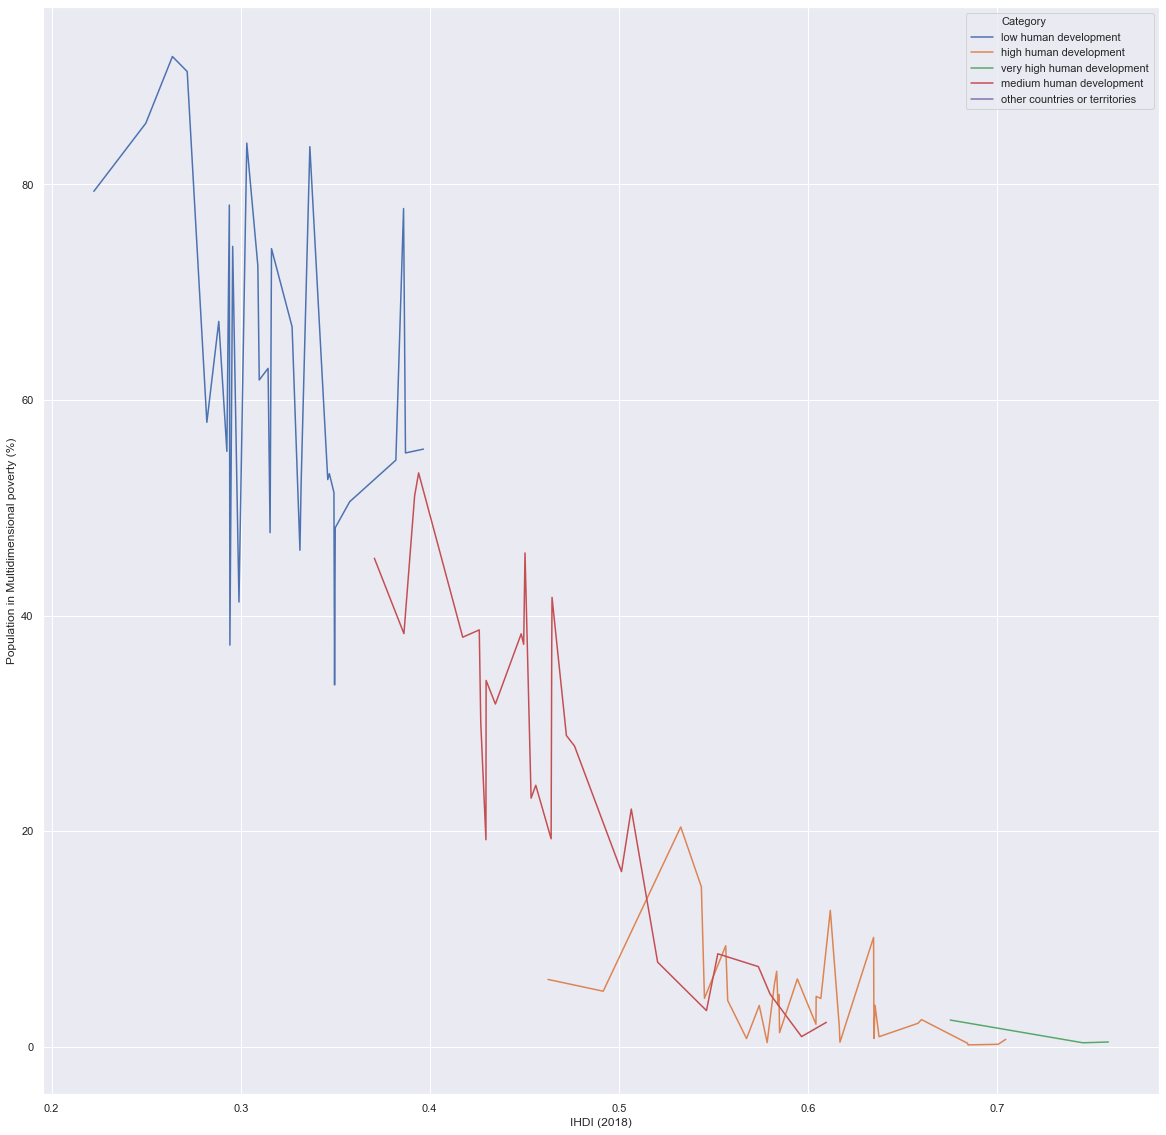

In [40]:
plt.figure(figsize=(20,20))
sns.lineplot(x='IHDI (2018)', y='Population in Multidimensional poverty (%)',
             hue='Category', markers = True, dashes = False,
             data=indic_by_c)
plt.show()

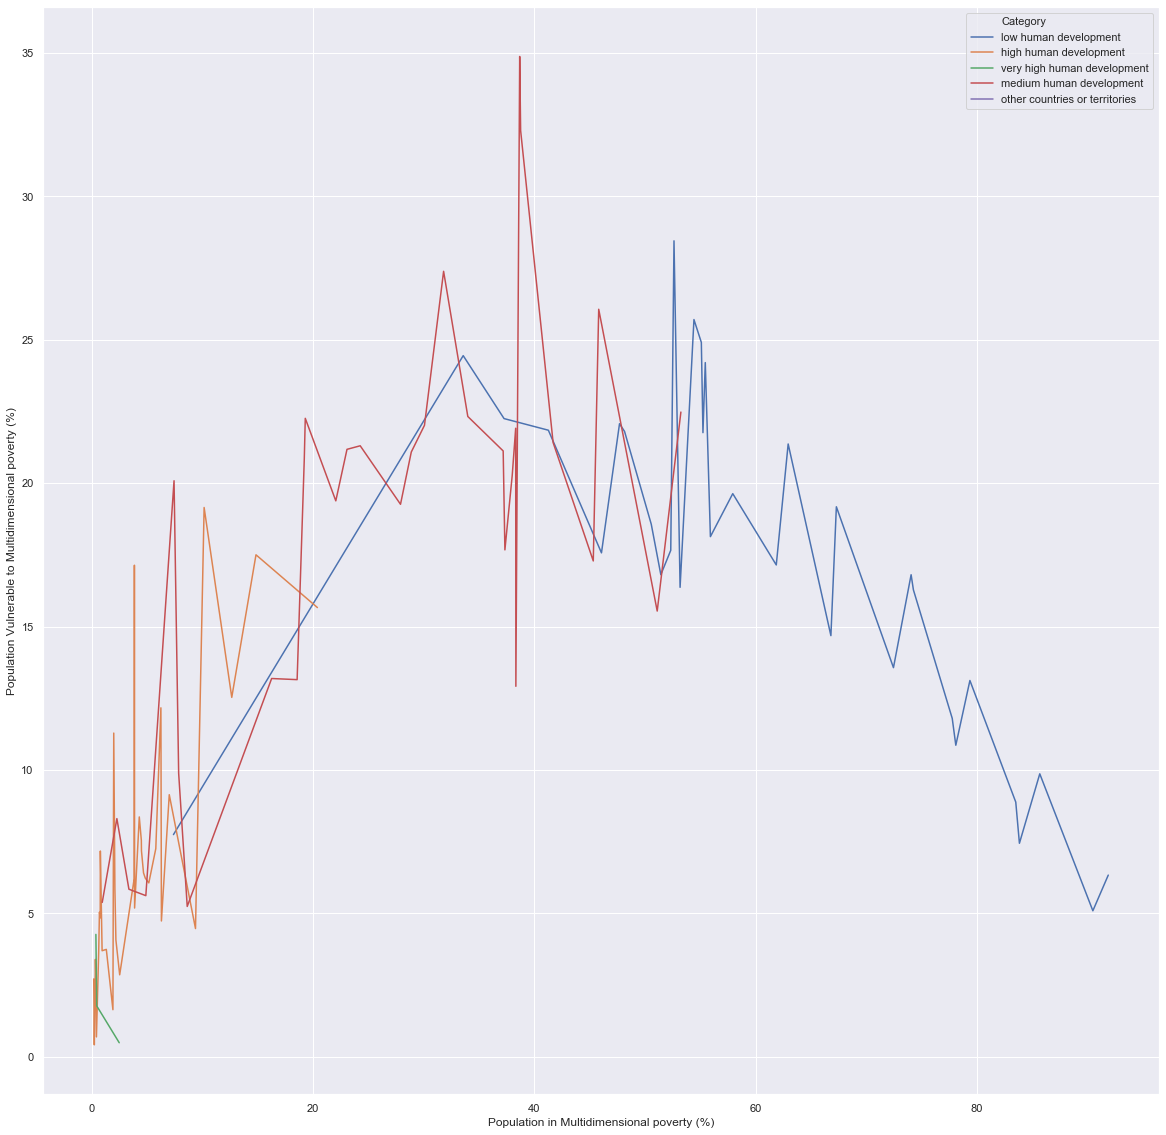

In [41]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Population in Multidimensional poverty (%)', y='Population Vulnerable to Multidimensional poverty (%)',
             hue='Category', markers = True, dashes = False,
             data=indic_by_c)
plt.show()

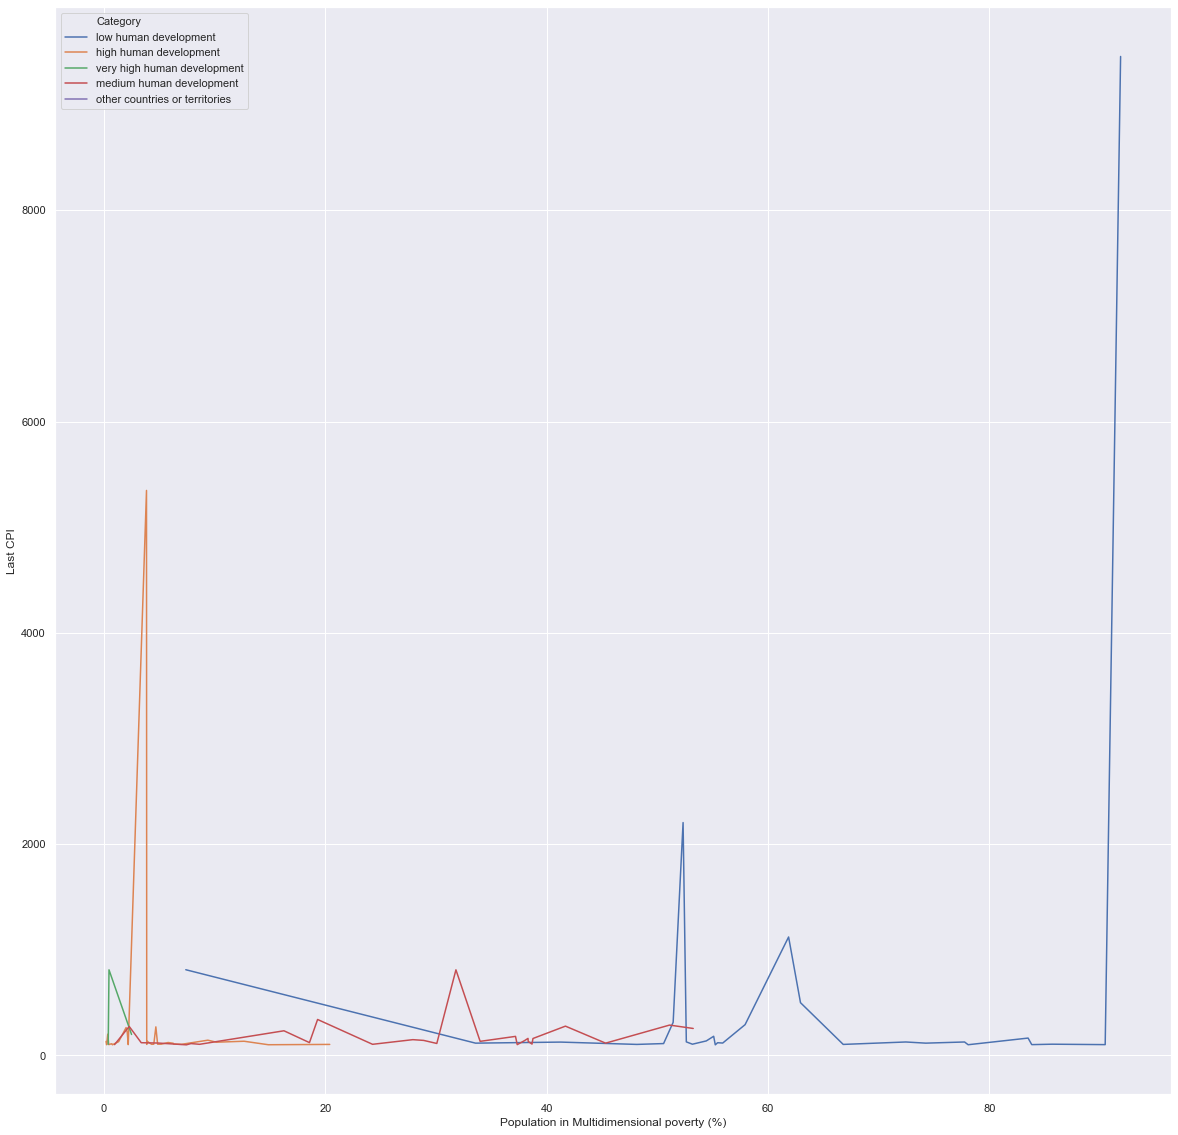

In [43]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Population in Multidimensional poverty (%)', y='Last CPI',
             hue='Category', markers = True, dashes = False,
             data=indic_by_c)
plt.show()

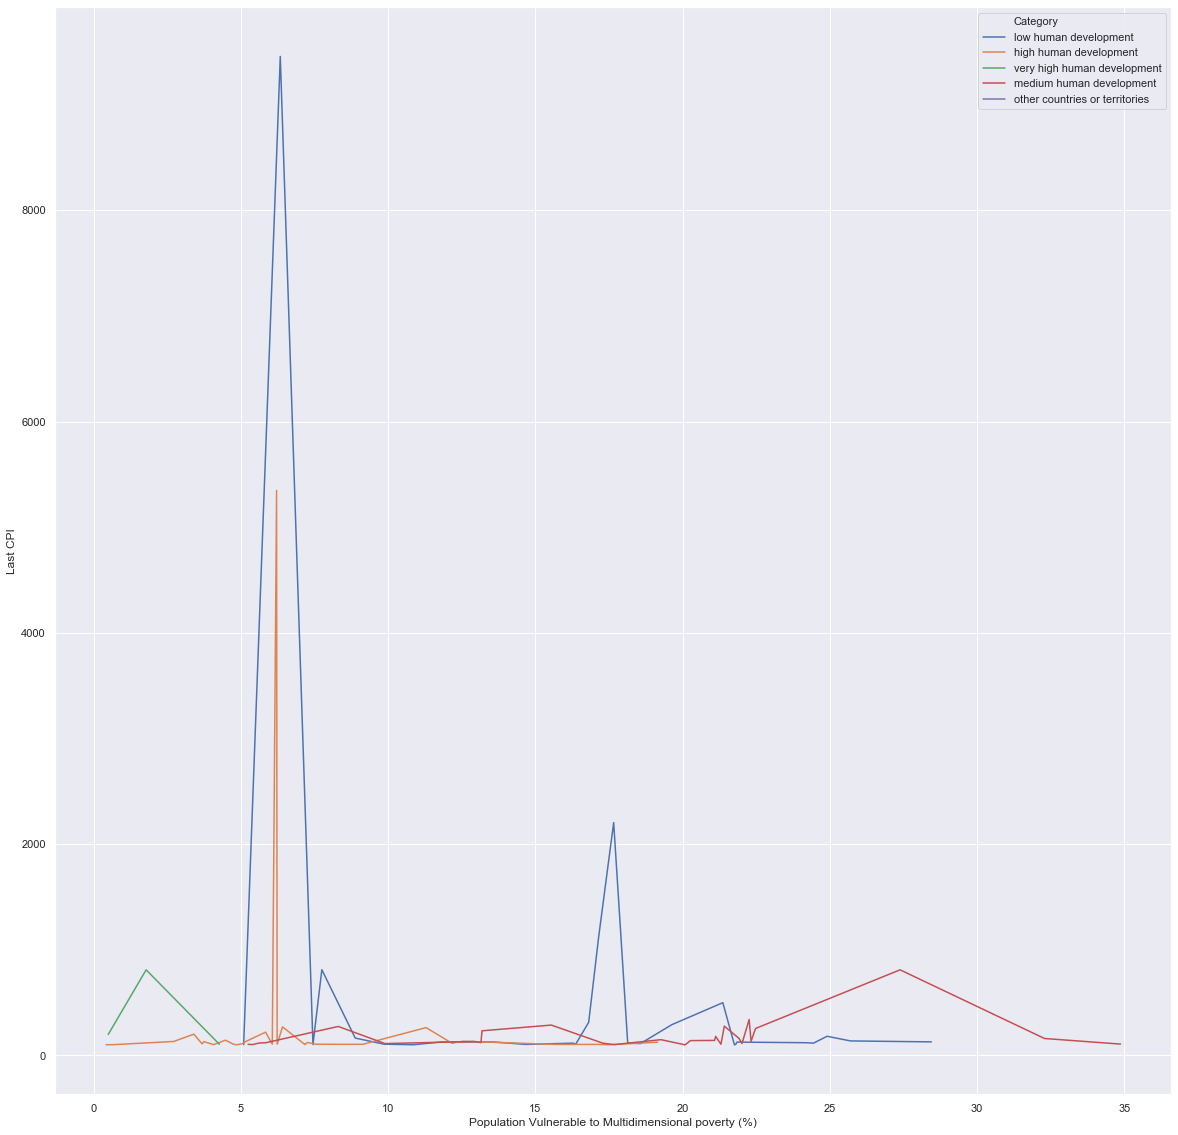

In [45]:
plt.figure(figsize=(20,20))
sns.lineplot(x='Population Vulnerable to Multidimensional poverty (%)', y='Last CPI',
             hue='Category', markers = True, dashes = False,
             data=indic_by_c)
plt.show()

In [ ]:
indic_by_c_countries = indic_by_c.groupby(['Country']).describe().index.to_list()

In [43]:
pop_per_re_l_s_s_g = my_var['population_percent_region_labour_status_sex_gender_Q2005_2019_.xlsx']
pop_per_re_l_s_s_g.drop(pop_per_re_l_s_s_g.columns[1:52], axis = 1, inplace = True)
pop_per_re_l_s_s_g.head(5)

,Unnamed: 0,2018K1,2018K2,2018K3,2018K4,2019K1,2019K2,2019K3,2019K4
0,Stockholm unemployed,6.0,5.9,5.1,5.4,5.8,6.1,6.6,5.8
1,Stockholm employed,71.8,73.0,72.5,72.2,72.5,73.1,72.7,72.4
2,Uppsala unemployed,5.3,5.6,4.6,5.7,5.5,6.4,5.0,5.6
3,Uppsala employed,67.8,69.1,66.7,65.3,66.4,68.0,70.9,68.4
4,Södermanland unemployed,10.0,7.9,6.2,6.3,9.3,7.0,6.8,7.9


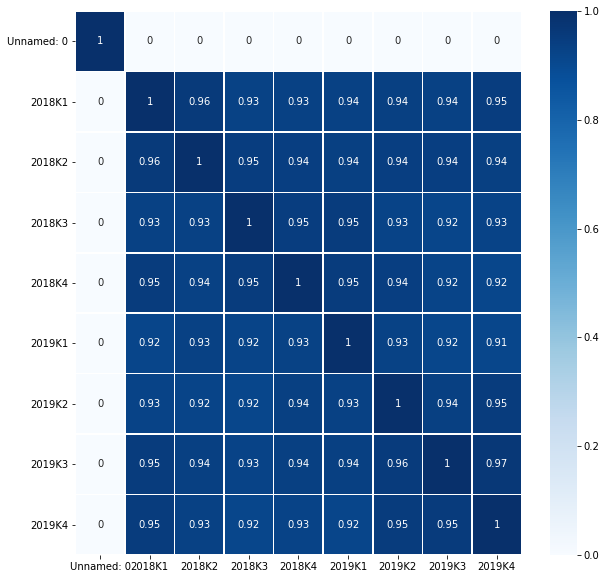

In [44]:
snspps(pop_per_re_l_s_s_g, 10)

In [45]:
un_per_s_age = my_var['unemployed_percent_sex_age_M2005_2020_.xlsx']
un_per_s_age.drop(un_per_s_age.columns[1:165], axis = 1, inplace = True)
un_per_s_age.head(5)

,Unnamed: 0,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02
0,unemployed 15-24 years men,15.0,18.9,25.1,25.6,21.0,25.6,24.1,16.4,15.8,15.4,20.8,17.6,18.1,27.2,22.4
1,unemployed 15-74 years men,6.2,6.2,7.6,7.6,6.5,7.0,7.2,6.6,6.4,5.9,6.1,6.6,6.1,8.0,8.1
2,unemployed 15-24 years women,13.1,23.9,22.2,20.9,24.1,21.7,22.9,15.6,16.8,19.8,14.0,18.2,14.5,16.6,23.1
3,unemployed 15-74 years women,5.9,6.9,6.9,7.7,7.0,7.2,7.2,7.2,7.4,6.2,6.0,7.1,6.0,7.0,8.3
4,unemployed 15-24 years total,14.0,21.3,23.7,23.3,22.4,23.7,23.6,16.0,16.2,17.5,17.4,17.9,16.3,22.1,22.7


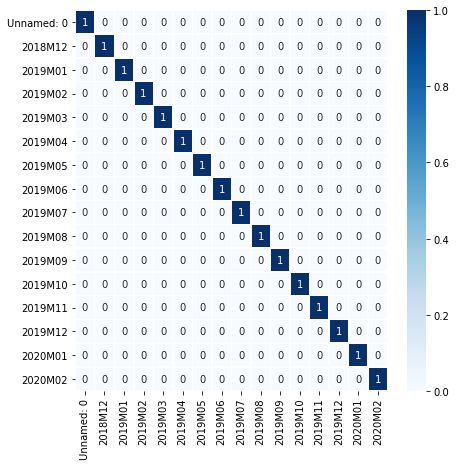

In [46]:
snspps(un_per_s_age, 7)

In [47]:
un_s_adj = my_var['unemployed_seasonally_adjusted_M2013_2020_.xlsx']
un_s_adj.drop(un_s_adj.columns[1:72], axis = 1, inplace = True)
un_s_adj.head(5)

,Unnamed: 0,2018M12,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,2019M11,2019M12,2020M01,2020M02
0,"Population, thousands",7485.0,7490.0,7494.0,7498.0,7501.0,7504.0,7507.0,7510.0,7514.0,7520.0,7525.0,7527.0,7527,7530.0,7532.0
1,"Labour force, thousands",5411.0,5371.0,5427.0,5521.0,5474.0,5444.0,5656.0,5659.0,5546.0,5500.0,5468.0,5517.0,5444,5444.0,5531.0
2,"Number of employed, thousands",5083.0,5020.0,5030.0,5096.0,5105.0,5057.0,5249.0,5269.0,5166.0,5168.0,5138.0,5140.0,5115,5034.0,5077.0
3,"Employment rate, percent",67.9,67.0,67.1,68.0,68.1,67.4,69.9,70.2,68.8,68.7,68.3,68.3,68,66.9,67.4
4,"Number of unemployed, thousands",328.0,351.0,397.0,424.0,370.0,387.0,407.0,390.0,380.0,332.0,330.0,378.0,329,410.0,454.0


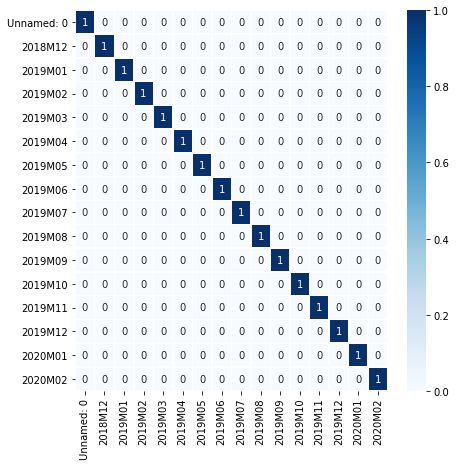

In [48]:
snspps(un_s_adj, 7)

In [49]:
whole_un_by_s_and_sub = my_var['whole_unemployment_by_sector_and_subsample.csv']
whole_un_by_s_and_sub.head(5)

,Country name,Country Code,Region,Year of Survey,Survey Type,Subsample,Total population,Agriculture (aged 15-64),Industry (aged 15-64),Services (aged 15-64),Female in non-agricultural employment (aged 15-64),Youth in non-agricultural employment (aged 15-64),Mining (aged 15-64),Manufacturing (aged 15-64),Public utilities (aged 15-64),Construction (aged 15-64),Commerce (aged 15-64),Transport & Communication (aged 15-64),Financial and Business Services (aged 15-64),Public Administration (aged 15-64),Other services (aged 15-64),Senior Officials (aged 15-64),Professionals (aged 15-64),Technicians (aged 15-64),Clerks (aged 15-64),Service and Market Sales (aged 15-64),Skilled Agriculture (aged 15-64),Craft Workers (aged 15-64),Machine Operators (aged 15-64),Elementary Occupations (aged 15-64),Armed Forces
0,Afghanistan,AFG,South Asia,2011,nrva,Female,13105589,0.54,0.23,0.22,0.46,0.56,0.0,0.23,0.0,0.00,0.00,0.00,0.0,0.01,0.21,0.0,0.09,0.0,0.0,0.04,0.0,0.20,0.05,0.32,0.0
1,Afghanistan,AFG,South Asia,2011,nrva,Higher education,8168829,0.16,0.10,0.73,0.86,0.78,0.0,0.04,0.0,0.06,0.14,0.08,0.0,0.16,0.36,0.0,0.22,0.0,0.0,0.34,0.0,0.05,0.08,0.19,0.0
2,Afghanistan,AFG,South Asia,2011,nrva,Lower education,18785967,0.44,0.19,0.37,0.40,0.60,0.0,0.08,0.0,0.11,0.10,0.06,0.0,0.04,0.17,0.0,0.01,0.0,0.0,0.15,0.0,0.09,0.08,0.47,0.0
3,Afghanistan,AFG,South Asia,2011,nrva,Male,13849207,0.35,0.16,0.49,NaN,0.66,0.0,0.04,0.0,0.12,0.13,0.07,0.0,0.07,0.21,0.0,0.05,0.0,0.0,0.22,0.0,0.06,0.08,0.43,0.0
4,Afghanistan,AFG,South Asia,2011,nrva,Old worker,8138972,0.39,0.15,0.46,0.41,NaN,0.0,0.06,0.0,0.09,0.11,0.07,0.0,0.07,0.21,0.0,0.06,0.0,0.0,0.20,0.0,0.07,0.08,0.42,0.0


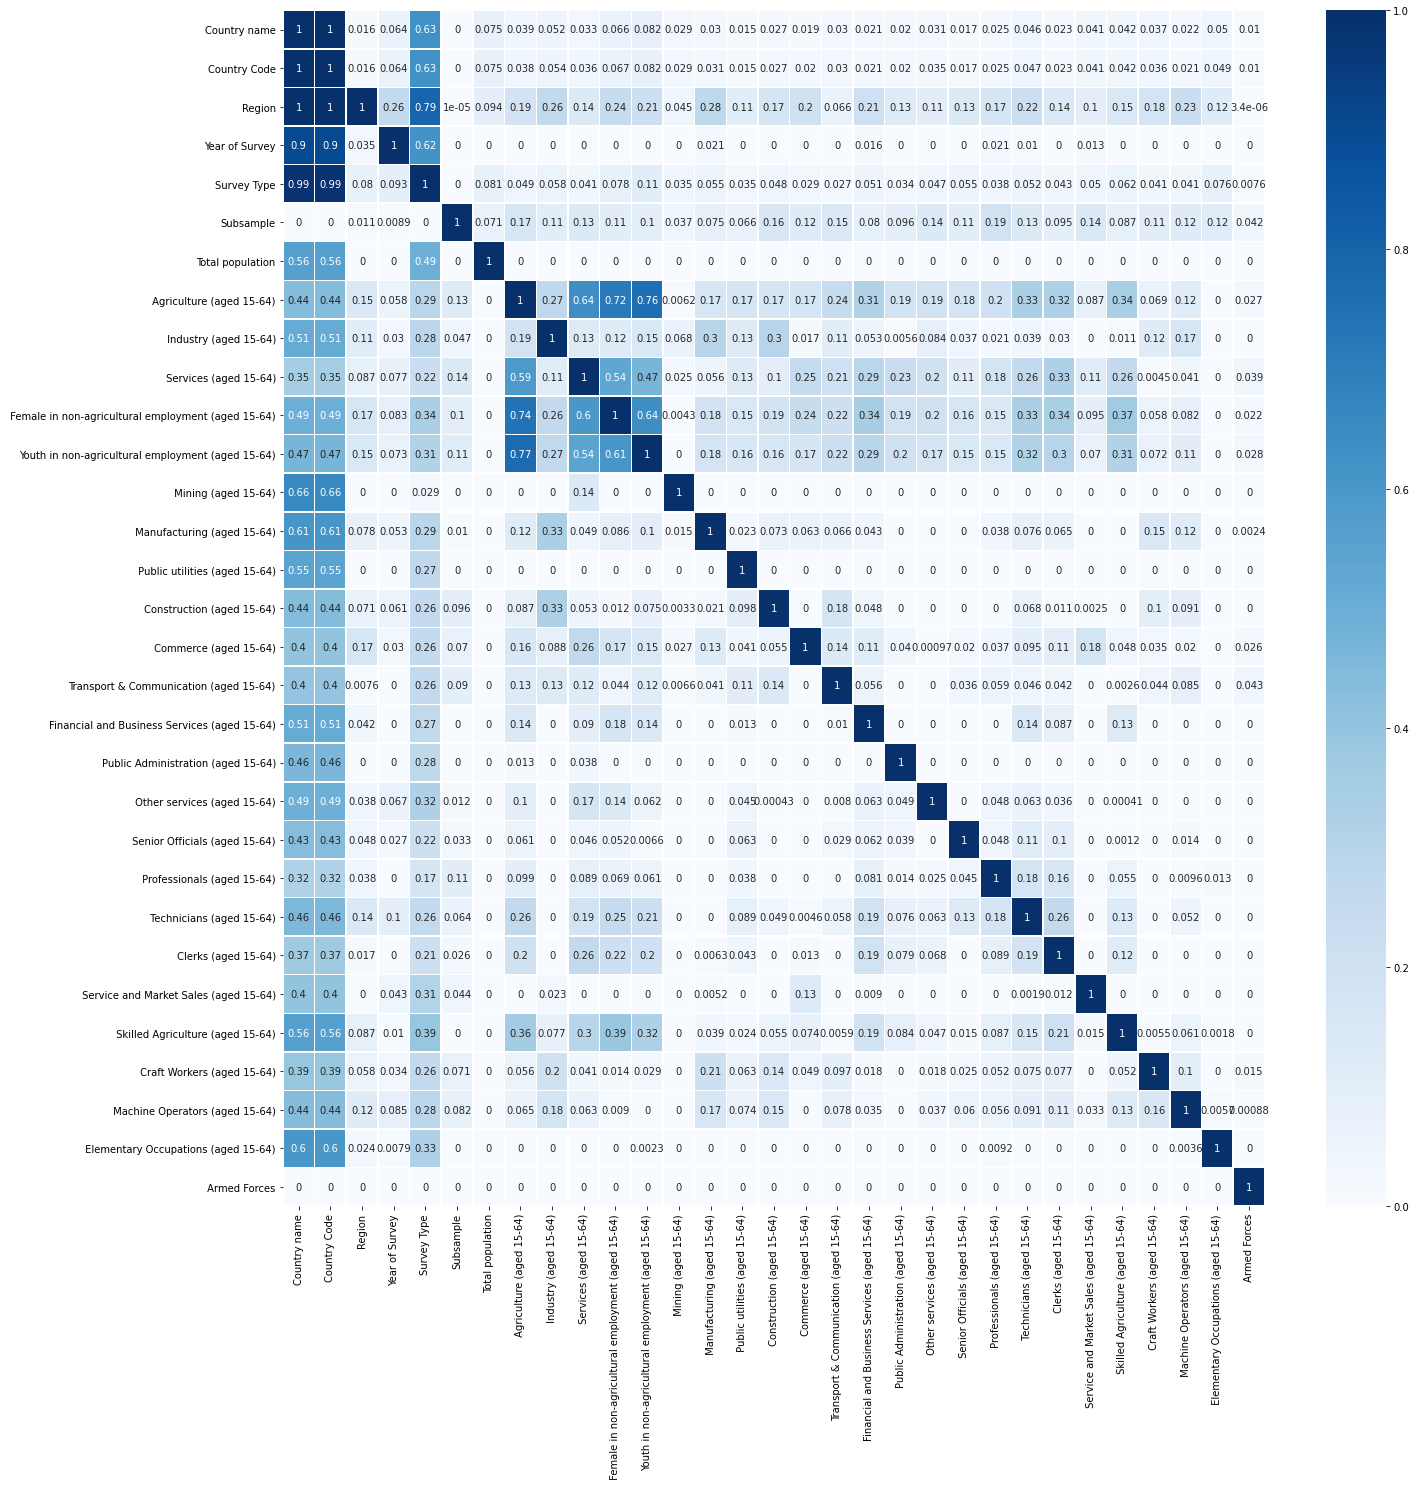

In [50]:
snspps(whole_un_by_s_and_sub, 22)

In [ ]:
#sns.pairplot(whole_un_by_s_and_sub, hue="Subsample")

In [ ]:
whole_un_by_s_and_sub_countries = whole_un_by_s_and_sub.groupby(['Country name']).describe().index.to_list()

In [53]:
whole_un_by_s_tot = my_var['whole_unemployment_by_sector_total.csv']
whole_un_by_s_tot.head(5)

,Country name,Country Code,Region,Year of Survey,Survey Type,Subsample,Total population,Agriculture (aged 15-64),Industry (aged 15-64),Services (aged 15-64),Female in non-agricultural employment (aged 15-64),Youth in non-agricultural employment (aged 15-64),Mining (aged 15-64),Manufacturing (aged 15-64),Public utilities (aged 15-64),Construction (aged 15-64),Commerce (aged 15-64),Transport & Communication (aged 15-64),Financial and Business Services (aged 15-64),Public Administration (aged 15-64),Other services (aged 15-64),Senior Officials (aged 15-64),Professionals (aged 15-64),Technicians (aged 15-64),Clerks (aged 15-64),Service and Market Sales (aged 15-64),Skilled Agriculture (aged 15-64),Craft Workers (aged 15-64),Machine Operators (aged 15-64),Elementary Occupations (aged 15-64),Armed Forces
0,Afghanistan,AFG,South Asia,2011,nrva,Total,26954796,0.38,0.17,0.45,0.46,0.64,0.00,0.07,0.00,0.10,0.11,0.06,0.00,0.06,0.21,0.00,0.05,0.00,0.00,0.19,0.00,0.08,0.08,0.41,0.00
1,Albania,ALB,Europe and Central Asia,2012,lsms,Total,2802801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Sub-Saharan Africa,2008,ibep-,Total,16367881,0.54,0.05,0.41,0.36,0.38,0.00,0.02,0.00,0.03,0.18,0.04,0.00,0.05,0.13,0.02,0.03,0.05,0.02,0.11,0.39,0.07,0.04,0.25,0.02
3,Armenia,ARM,Europe and Central Asia,2016,ilcs,Total,2983174,0.33,0.19,0.48,0.62,0.65,0.01,0.09,0.03,0.06,0.13,0.06,0.03,0.08,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Azerbaijan,AZE,Europe and Central Asia,2015,amssw,Total,8332984,0.34,0.23,0.44,0.55,0.58,0.00,0.09,0.02,0.11,0.07,0.05,0.04,0.19,0.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


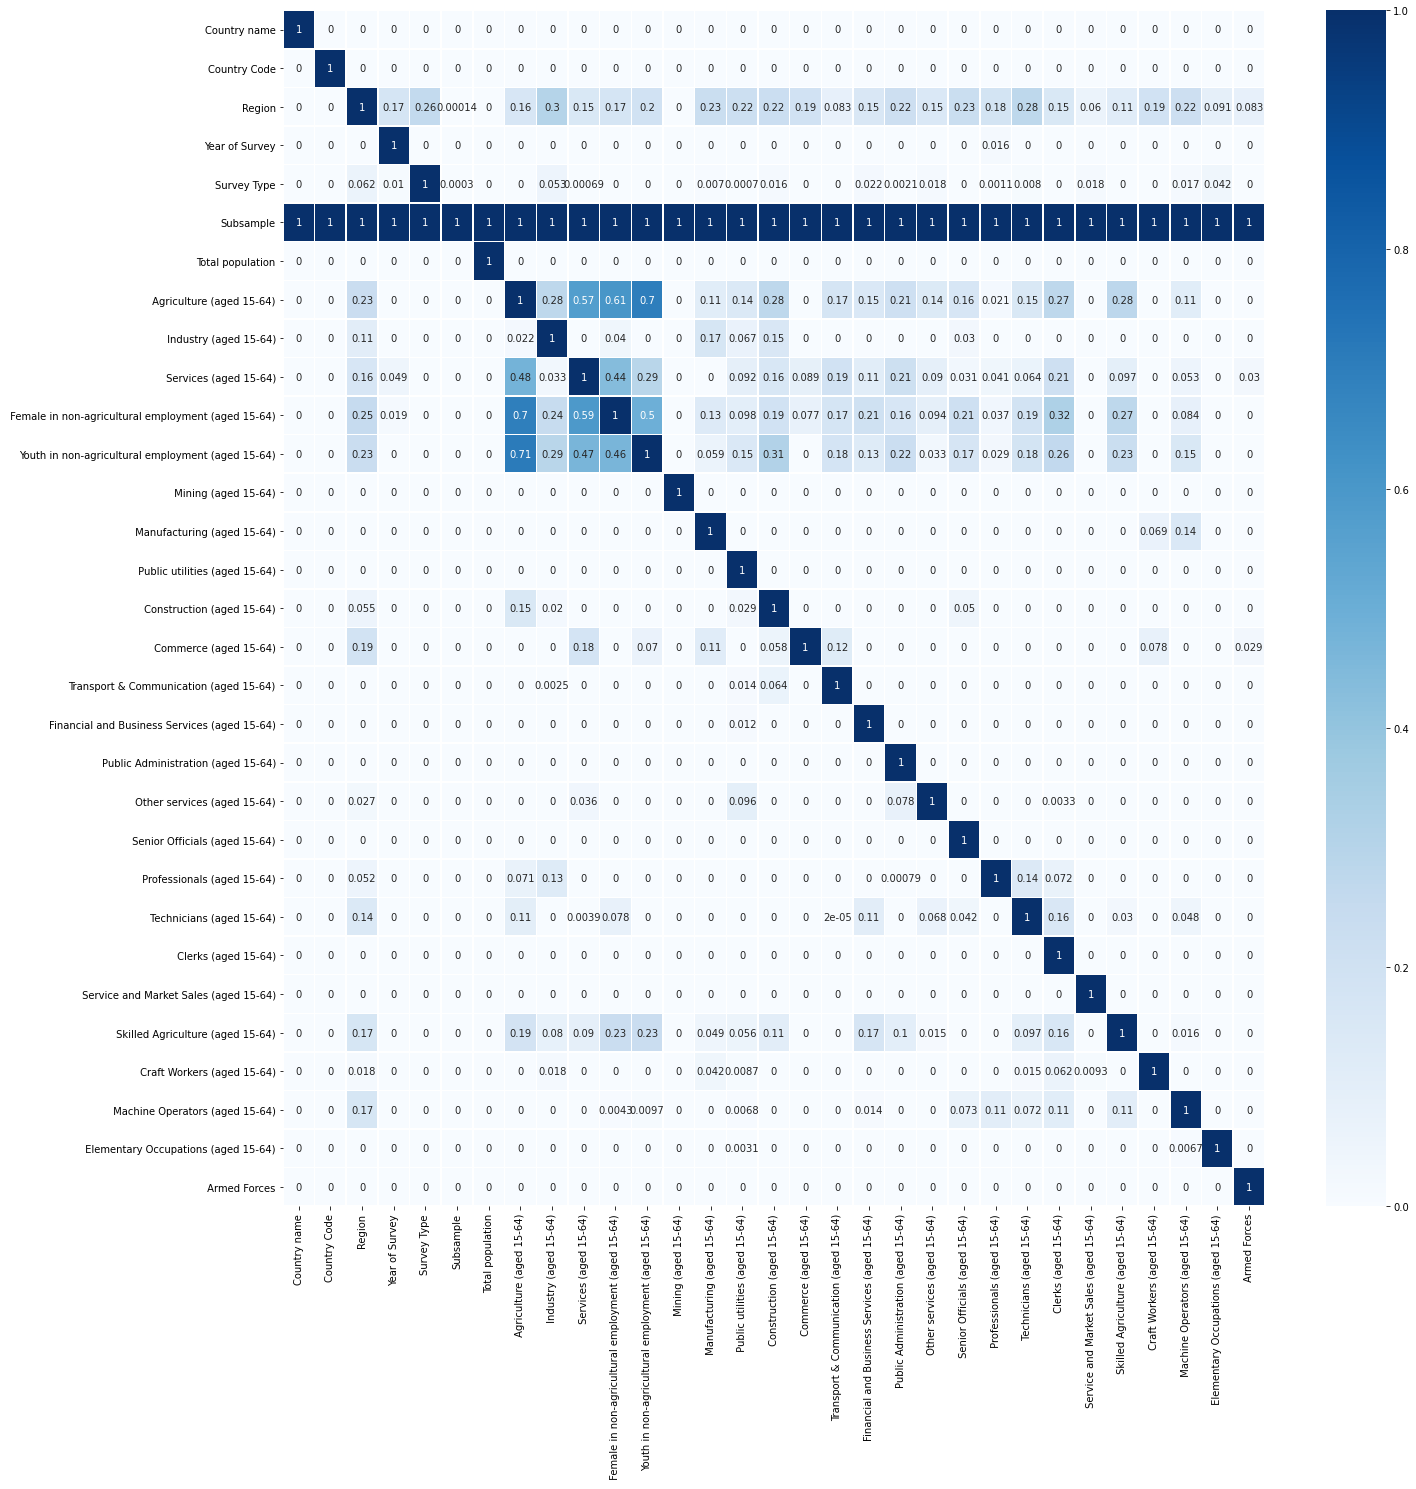

In [54]:
snspps(whole_un_by_s_tot, 22)

## List of countries which are included in all the datasets


In [ ]:
countries = HDI_HDI_countries + IHDI_HDI_countries + OECD_mdi_countries + \
             Oxfor_mdc_2020_04_23_countries + indic_by_c_countries + \
             whole_un_by_s_and_sub_countries

In [56]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab States',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "CÃ´te d'Ivoire",
 'Denmark',
 'Developing Countries',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia and the Pacific',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini (Kingdom of)',
 'Ethiopia',
 'Europe and Central Asia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',

In [57]:
len(countries)

841

In [ ]:
countries = list(dict.fromkeys(countries))

In [59]:
len(countries)

250

In [60]:
countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Arab States',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "CÃ´te d'Ivoire",
 'Denmark',
 'Developing Countries',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Asia and the Pacific',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini (Kingdom of)',
 'Ethiopia',
 'Europe and Central Asia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',

In [61]:
pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import process

In [ ]:
def list_check(list1,list2):
  ratios = process.extract(list1, list2)
  print(ratios)
  highest = process.extractOne(list1, list2)
  print(highest)
  return

In [64]:
list_check('congo', HDI_HDI_countries)

[('Congo', 100), ('Congo (Democratic Republic of the)', 90), ('Mongolia', 72), ('Togo', 67), ('Tonga', 60)]
('Congo', 100)
